In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
raw_data = pd.read_csv('train_clean.csv')

In [8]:
raw_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


#### Q1. Select the information of the people who paid the top 10 highest fares and state your observation ?

In [10]:
raw_data.columns.values

array(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title',
       'Family_Size'], dtype=object)

In [9]:
raw_data.sort_values("Fare",ascending=False).iloc[0:10]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,Miss,0
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,Mr,0
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,Mr,1
88,23.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Mabel Helen",2,89,1,female,3,1.0,19950,Miss,5
27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,Mr,5
341,24.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,1.0,19950,Miss,5
438,64.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Mark",4,439,1,male,1,0.0,19950,Mr,5
311,18.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Emily Borie",2,312,1,female,2,1.0,PC 17608,Miss,4
742,21.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Susan Parker ""Suzette""",2,743,1,female,2,1.0,PC 17608,Miss,4
118,24.0,B58 B60,C,247.5208,"Baxter, Mr. Quigg Edmond",1,119,1,male,0,0.0,PC 17558,Mr,1


**Observation: It seems that people who paid the highest fees had better chances of surviving.**

#### Q2. What percentage of females from the 1st class survived?

In [22]:
# number of female in 1st class that survived
fsurvived = raw_data[raw_data["Sex"] == "female"].query("Pclass == 1").sum()["Survived"]
# number of femaes in 1st class
ftotal = raw_data[raw_data["Sex"] == "female"].query("Pclass == 1").shape[0]
survived = fsurvived/ftotal*100
print(survived)

96.80851063829788


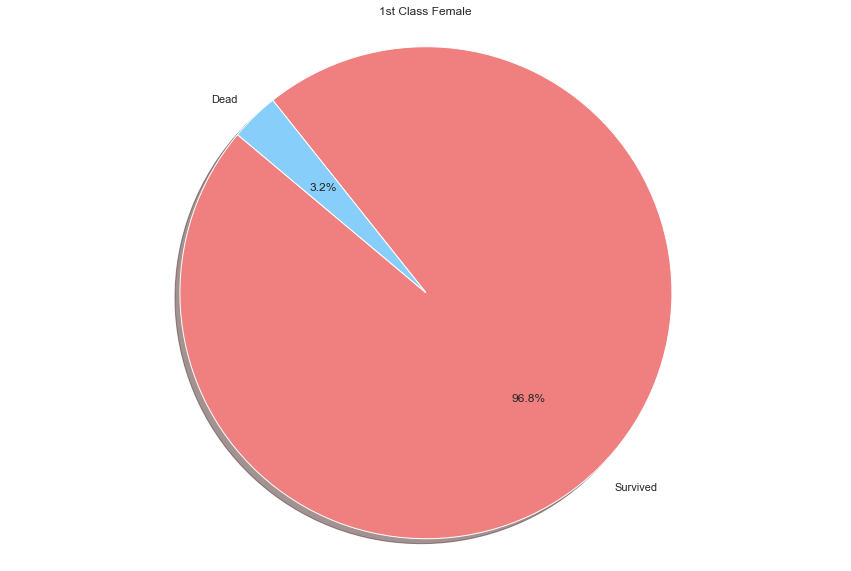

In [29]:
# Data to plot
labels = ['Survived', 'Dead']
sizes = [survived,100-survived]
colors = ['lightcoral', 'lightskyblue']

f, ax = plt.subplots(figsize=(15, 10)) 
# Plot
plt.pie(sizes,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140 )
plt.title("1st Class Female" )
plt.axis('equal')
plt.show()

### Q3. Build a ensemle learning model using bagging technique ?

In [32]:
raw_data.isnull().sum()

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [35]:
data = raw_data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [41]:
data_with_dummies = pd.get_dummies(data , drop_first=True)

In [42]:
y = data_with_dummies['Survived']
x = data_with_dummies.drop(['Survived'],axis = 1)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
scaler.fit(x)

MinMaxScaler()

In [46]:
X = scaler.fit_transform(x)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# build the model
meta_estimator = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))

# fit the model
meta_estimator.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10))

In [89]:
bagging_score = metrics.roc_auc_score(y_test, y_pred)

### Q4. What is area under the roc curve and plot it?
Note : Legend should contain auc_roc score

In [50]:
y_pred = meta_estimator.predict(X_test)

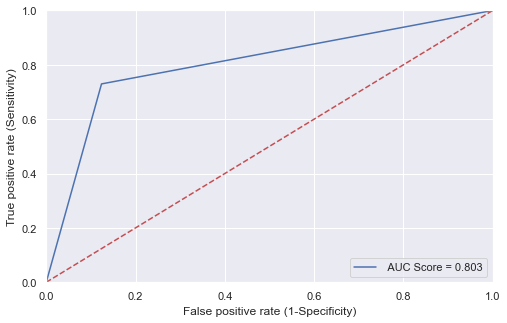

In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.patches as mpatches
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr,label=' AUC Score = %0.3f'%(bagging_score))

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.legend(loc='lower right')

plt.grid(True)

### Q5. Build a model using AdaBoost and compare it's performance with above model ?

In [84]:
from sklearn.ensemble import AdaBoostClassifier

# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(X_train, y_train)




AdaBoostClassifier(random_state=10)

In [87]:
# predict the values
y_pred_adaboost  = adaboost.predict(X_test)

In [90]:
adaboost_score = metrics.roc_auc_score(y_test, y_pred_adaboost)

In [91]:
df = pd.DataFrame()
df['Model'] = ['Bagging','AdaBoost']
df['AUC roc curve'] = [bagging_score,adaboost_score]

In [92]:
df

,Model,AUC roc curve
0,Bagging,0.802960
1,AdaBoost,0.797426
